# Data Preprocessing

In [11]:
import csv
import glob
import os
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# specifying the folder path
folder_path = "/content/drive/My Drive/MLP/"

# getting a list of all CSV files in the folder
csv_files = glob.glob(folder_path + "*.csv")
print("Found CSV files:", csv_files)

# creating an empty dictionary to store DataFrames
data_frames = {}

# reading each CSV file and storing its DataFrame in a dictionary
for file in csv_files:
    file_name = os.path.basename(file).replace(' - FAOSTAT_data_en_2-27-2024.csv', '').replace(' - FAOSTAT_data_en_2-22-2024.csv', '')
    print("Reading file:", file)
    df = pd.read_csv(file)
    print("Loaded DataFrame size:", df.shape)
    data_frames[file_name] = df

# printing the keys
print("Available DataFrames:", data_frames.keys())

# helper function to ensure consistent data types
def ensure_consistent_types(df, area_col='Area', year_col='Year'):
    df[area_col] = df[area_col].astype(str)
    df[year_col] = df[year_col].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) else int(x))
    return df

# function to add all available years to each dataframe
def add_missing_years(df, all_years):
    unique_areas = df['Area'].unique()
    expanded_df = pd.DataFrame()
    for area in unique_areas:
        area_df = df[df['Area'] == area]
        area_df = area_df.set_index('Year').reindex(all_years).reset_index()
        area_df['Area'] = area
        expanded_df = pd.concat([expanded_df, area_df])
    return expanded_df

# getting a list of all years across all datasets
all_years = sorted(set(year for df in data_frames.values() for year in df['Year'].apply(lambda x: int(x.split('-')[0]) if isinstance(x, str) else int(x)).unique()))

# Feature engineering and merging relevant data

# Consumer price indicators
cpi_data = ensure_consistent_types(data_frames['Consumer prices indicators'])
cpi_data = cpi_data[['Area', 'Year', 'Value']]
cpi_data = cpi_data.groupby(['Area', 'Year']).mean().reset_index()
cpi_data = add_missing_years(cpi_data, all_years)
cpi_data.rename(columns={'Value': 'CPI'}, inplace=True)

# Crops production indicators
crops_data = ensure_consistent_types(data_frames['Crops production indicators'])
crops_data = crops_data[['Area', 'Year', 'Value']]
crops_data = crops_data.groupby(['Area', 'Year']).sum().reset_index()
crops_data = add_missing_years(crops_data, all_years)
crops_data.rename(columns={'Value': 'Crop_Production'}, inplace=True)

# Emissions
emissions_data = ensure_consistent_types(data_frames['Emissions'])
emissions_data = emissions_data[['Area', 'Year', 'Value']]
emissions_data = emissions_data.groupby(['Area', 'Year']).sum().reset_index()
emissions_data = add_missing_years(emissions_data, all_years)
emissions_data.rename(columns={'Value': 'Emissions'}, inplace=True)

# Employment
employment_data = ensure_consistent_types(data_frames['Employment'])
employment_data = employment_data[['Area', 'Year', 'Value']]
employment_data = employment_data.groupby(['Area', 'Year']).mean().reset_index()
employment_data = add_missing_years(employment_data, all_years)
employment_data.rename(columns={'Value': 'Employment'}, inplace=True)

# Exchange rate
exchange_rate_data = ensure_consistent_types(data_frames['Exchange rate'])
exchange_rate_data = exchange_rate_data[['Area', 'Year', 'Value']]
exchange_rate_data = exchange_rate_data.groupby(['Area', 'Year']).mean().reset_index()
exchange_rate_data = add_missing_years(exchange_rate_data, all_years)
exchange_rate_data.rename(columns={'Value': 'Exchange_Rate'}, inplace=True)

# Fertilizers use
fertilizers_data = ensure_consistent_types(data_frames['Fertilizers use'])
fertilizers_data = fertilizers_data[['Area', 'Year', 'Value']]
fertilizers_data = fertilizers_data.groupby(['Area', 'Year']).sum().reset_index()
fertilizers_data = add_missing_years(fertilizers_data, all_years)
fertilizers_data.rename(columns={'Value': 'Fertilizers_Use'}, inplace=True)

# Food security indicators
food_security_data = ensure_consistent_types(data_frames['Food security indicators '])
food_security_data = food_security_data[['Area', 'Year', 'Value']]
food_security_data = food_security_data.groupby(['Area', 'Year']).mean().reset_index()
food_security_data = add_missing_years(food_security_data, all_years)
food_security_data.rename(columns={'Value': 'Food_Security'}, inplace=True)

# Food balances indicators
food_balances_data = ensure_consistent_types(data_frames['Food balances indicators'])
food_balances_data = food_balances_data[['Area', 'Year', 'Value']]
food_balances_data = food_balances_data.groupby(['Area', 'Year']).sum().reset_index()
food_balances_data = add_missing_years(food_balances_data, all_years)
food_balances_data.rename(columns={'Value': 'Food_balances_indicator'}, inplace=True)

# Food trade indicators (Target variable)
food_trade_data = ensure_consistent_types(data_frames['Food trade indicators'])
food_trade_data = food_trade_data[['Area', 'Year', 'Value']]
food_trade_data = food_trade_data.groupby(['Area', 'Year']).sum().reset_index()
food_trade_data = add_missing_years(food_trade_data, all_years)
food_trade_data.rename(columns={'Value': 'Export_Value'}, inplace=True)

# Foreign direct investment
fdi_data = ensure_consistent_types(data_frames['Foreign direct investment'])
fdi_data = fdi_data[['Area', 'Year', 'Value']]
fdi_data = fdi_data.groupby(['Area', 'Year']).sum().reset_index()
fdi_data = add_missing_years(fdi_data, all_years)
fdi_data.rename(columns={'Value': 'Foreign_direct_investment'}, inplace=True)

# Land temperature change
temp_change_data = ensure_consistent_types(data_frames['Land temperature change'])
temp_change_data = temp_change_data[['Area', 'Year', 'Value']]
temp_change_data = temp_change_data.groupby(['Area', 'Year']).mean().reset_index()
temp_change_data = add_missing_years(temp_change_data, all_years)
temp_change_data.rename(columns={'Value': 'Temp_Change'}, inplace=True)

# Land use
land_use_data = ensure_consistent_types(data_frames['Land use'])
land_use_data = land_use_data[['Area', 'Year', 'Value']]
land_use_data = land_use_data.groupby(['Area', 'Year']).sum().reset_index()
land_use_data = add_missing_years(land_use_data, all_years)
land_use_data.rename(columns={'Value': 'Land_Use'}, inplace=True)

# Pesticides use
pesticides_data = ensure_consistent_types(data_frames['Pesticides use'])
pesticides_data = pesticides_data[['Area', 'Year', 'Value']]
pesticides_data = pesticides_data.groupby(['Area', 'Year']).sum().reset_index()
pesticides_data = add_missing_years(pesticides_data, all_years)
pesticides_data.rename(columns={'Value': 'Pesticides_Use'}, inplace=True)

# merging all dataframes on 'Area' and 'Year'
dfs = [cpi_data, crops_data, emissions_data, employment_data, exchange_rate_data,
       fertilizers_data, food_security_data, food_balances_data, fdi_data, temp_change_data, land_use_data, pesticides_data]
data = food_trade_data

for df in dfs:
    data = data.merge(df, on=['Area', 'Year'], how='left')

# handling missing values by filling with NaNs
data = data.fillna(np.nan)

# encoding categorical variables
data = pd.get_dummies(data, columns=['Area'], drop_first=True)

# printing column names - debug
print("Columns after processing:\n", data.columns)

# exporting the combined data to a CSV file
output_path = folder_path + "Combined-csv/combined_data_all_years.csv"
data.to_csv(output_path, index=False)
print(f"Combined data saved to {output_path}")

Mounted at /content/drive
Found CSV files: ['/content/drive/My Drive/MLP/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Emissions - FAOSTAT_data_en_2-27-2024.csv', '/content/drive/My Drive/MLP/Land use - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Exchange rate - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv', '/content/drive/My Drive/MLP/Employment - FAOSTAT_data_en_2-27-2024.csv', '/content/drive/My Drive/MLP/Pesticides use - FAOSTAT_data_en_2-27-2024.csv', '/content/drive/My Drive/MLP/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv', '/content/drive/My Drive/MLP/Land temperature change - FAOST

<ipython-input-11-debf21d5c2e3>:25: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Loaded DataFrame size: (97995, 15)
Reading file: /content/drive/My Drive/MLP/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv
Loaded DataFrame size: (112890, 17)
Reading file: /content/drive/My Drive/MLP/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv
Loaded DataFrame size: (148041, 14)
Reading file: /content/drive/My Drive/MLP/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv
Loaded DataFrame size: (141738, 15)
Reading file: /content/drive/My Drive/MLP/Exchange rate - FAOSTAT_data_en_2-22-2024.csv
Loaded DataFrame size: (103276, 16)
Reading file: /content/drive/My Drive/MLP/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv
Loaded DataFrame size: (17807, 14)
Reading file: /content/drive/My Drive/MLP/Employment - FAOSTAT_data_en_2-27-2024.csv
Loaded DataFrame size: (5917, 19)
Reading file: /content/drive/My Drive/MLP/Pesticides use - FAOSTAT_data_en_2-27-2024.csv
Loaded DataFrame size: (35202, 15)
Reading file: /content/drive/My Drive/MLP/Crops production indicators

# Multilayer Perceptron and Predictions

Mounted at /content/drive
Data size: (8932, 216)
Data columns: Index(['Year', 'Export_Value', 'CPI', 'Crop_Production', 'Emissions',
       'Employment', 'Exchange_Rate', 'Fertilizers_Use', 'Food_Security',
       'Food_balances_indicator',
       ...
       'Area_United States of America', 'Area_Uruguay', 'Area_Uzbekistan',
       'Area_Vanuatu', 'Area_Venezuela (Bolivarian Republic of)',
       'Area_Viet Nam', 'Area_Yemen', 'Area_Yugoslav SFR', 'Area_Zambia',
       'Area_Zimbabwe'],
      dtype='object', length=216)
Shape of training and validation set combined: (7145, 218)
Shape of test set: (1787, 218)
Train data shape: (5716, 218)
Validation data shape: (1429, 218)
Train labels shape: (5716,)
Test labels shape: (1787,)
Validation labels shape: (1429,)
Epoch 1/120, Train Loss: 83.0958, Val Loss: 26.0083
Found improvement in performance. New model saved.
Epoch 2/120, Train Loss: 24.3126, Val Loss: 21.9920
Found improvement in performance. New model saved.
Epoch 3/120, Train Loss: 

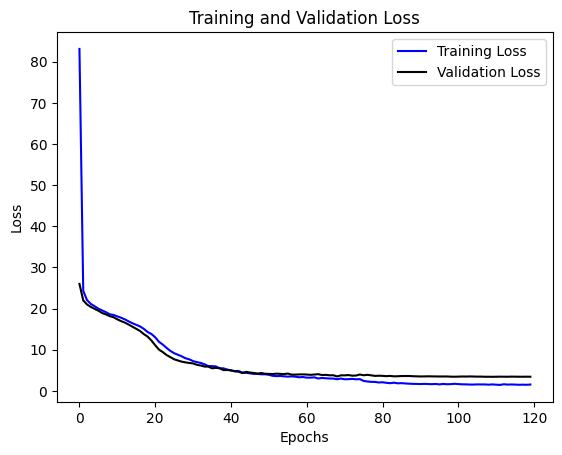

Best model saved to /content/drive/My Drive/MLP/best_model.pth
Predictions saved to /content/drive/My Drive/MLP/Predictions/predictions_Area_Albania.csv


In [12]:
import csv
import glob
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from copy import deepcopy
import random
from sklearn.metrics import mean_squared_error, r2_score

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# loading the combined data CSV file
file_path = '/content/drive/My Drive/MLP/Combined-csv/combined_data_all_years.csv'
data = pd.read_csv(file_path)

# checking the size and columns of the data
print("Data size:", data.shape)
print("Data columns:", data.columns)

# handling missing values
data = data.fillna(0)

# further feature engineering
# avoiding log transformation of zero or negative values
def safe_log1p(x):
    return np.log1p(np.where(x < 0, 0, x))

data['Log_CPI'] = safe_log1p(data['CPI'])
data['Log_Emissions'] = safe_log1p(data['Emissions'])
data['Log_Fertilizers_Use'] = safe_log1p(data['Fertilizers_Use'])
data['Log_Exchange_Rate'] = safe_log1p(data['Exchange_Rate'])
data['Log_Temp_Change'] = safe_log1p(data['Temp_Change'])
data['Log_Crop_Production'] = safe_log1p(data['Crop_Production'])
data['Log_Food_Security'] = safe_log1p(data['Food_Security'])
data['Log_Food_Balances_Indicator'] = safe_log1p(data['Food_balances_indicator'])

# defining interaction terms
data['CPI_Emissions'] = data['CPI'] * data['Emissions']
data['Land_Use_Temp_Change'] = data['Land_Use'] * data['Temp_Change']

# dropping original columns that have been transformed or interacted
data = data.drop(columns=['CPI', 'Emissions', 'Exchange_Rate', 'Temp_Change', 'Crop_Production', 'Food_Security', 'Food_balances_indicator'])

# separating features and target variables
X = data.drop(columns=['Export_Value'])
y = data['Export_Value']

# applying log transformation to the target variable
y = np.log1p(y)

# train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)

# scaling the features
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the datasets
print("Shape of training and validation set combined:", X_train_val.shape)
print("Shape of test set:", X_test.shape)
print("Train data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)
print("Validation labels shape:", y_val.shape)

# ensuring reproducibility
random.seed(69)
torch.manual_seed(69)
np.random.seed(69)

# creating the network structure for regression with dropout and L2 regularization
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.dropout = nn.Dropout(p=0.3)
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], 1)

    def forward(self, inputs):
        out = torch.relu(self.hidden_l1(inputs))
        out = self.dropout(out)
        out = torch.relu(self.hidden_l2(out))
        out = self.output_l3(out)
        return out

# A class for managing the data for training the model
class CropDataset(Dataset):
    def __init__(self, feats, labels):
        self.feats = torch.tensor(feats, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.feats[idx, :], self.labels[idx]

# creating an instance of the MLP network
feature_count = X_train_scaled.shape[1]
hidden_layer_sizes = [128, 64, 32, 16, 8, 4, 2]
model = MultilayerPerceptron(feature_count, hidden_layer_sizes)

# setting hyperparameters
num_epochs = 120
learning_rate = 0.001
batch_size = 128
weight_decay = 1e-5

# setting up the data loading by batch
# with the test and validation sets having only one batch
train_set = CropDataset(X_train_scaled, y_train)
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CropDataset(X_val_scaled, y_val)
val_dataloader = DataLoader(val_set, batch_size=len(val_set))

test_set = CropDataset(X_test_scaled, y_test)
test_dataloader = DataLoader(test_set, batch_size=len(test_set))

# setting up the Adam optimizer for updating the model weights with weight decay
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# computing mean squared error loss against the training labels
loss_function = nn.MSELoss()

best_val_loss = float('inf')
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    # setting the model to training mode
    model.train()

    train_loss_sum = 0.0

    for X_train_batch, y_train_batch in train_dataloader:
        optimizer.zero_grad()
        outputs = model(X_train_batch)
        loss = loss_function(outputs, y_train_batch)
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

    avg_train_loss = train_loss_sum / len(train_dataloader)
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        val_loss_sum = 0.0
        for X_val_batch, y_val_batch in val_dataloader:
            val_outputs = model(X_val_batch)
            val_loss = loss_function(val_outputs, y_val_batch)
            val_loss_sum += val_loss.item()

        avg_val_loss = val_loss_sum / len(val_dataloader)
        val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    scheduler.step(avg_val_loss)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = deepcopy(model.state_dict())
        print('Found improvement in performance. New model saved.')

# loading the best model
model.load_state_dict(best_model)

# testing the regression model
model.eval()
with torch.no_grad():
    test_loss_sum = 0.0
    for X_test_batch, y_test_batch in test_dataloader:
        test_outputs = model(X_test_batch)
        test_loss = loss_function(test_outputs, y_test_batch)
        test_loss_sum += test_loss.item()

    avg_test_loss = test_loss_sum / len(test_dataloader)
    y_test_pred = test_outputs.detach().numpy()
    y_test_true = y_test_batch.numpy()
    r2 = r2_score(y_test_true, y_test_pred)

print(f"Regression Test Loss: {avg_test_loss:.4f}, R2 Score: {r2:.4f}")

# plotting loss graph
plt.figure()
plt.plot(train_losses, 'b-', label='Training Loss')
plt.plot(val_losses, 'k-', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

import joblib

# saving the best model
model_save_path = '/content/drive/My Drive/MLP/best_model.pth'
torch.save(best_model, model_save_path)
print(f"Best model saved to {model_save_path}")

# loading the best model for prediction
model.load_state_dict(torch.load(model_save_path))

# defining variable for the target geographical region
target_region = 'Area_Albania'  # <<<<===    <<<<<===   change this value to target different regions as required

# preparing the new data for future years for the target region
future_years = [2024, 2025, 2026]
future_data = data[(data['Year'].isin(future_years)) & (data[target_region] == 1)]

if future_data.empty:
    sample_data = {
        'Year': future_years * 3,  # assuming 3 different records for each year
        target_region: [1] * 9,
        'Log_CPI': np.random.rand(9),
        'Log_Emissions': np.random.rand(9),
        'Log_Fertilizers_Use': np.random.rand(9),
        'Log_Exchange_Rate': np.random.rand(9),
        'Log_Temp_Change': np.random.rand(9),
        'Log_Crop_Production': np.random.rand(9),
        'Log_Food_Security': np.random.rand(9),
        'Log_Food_Balances_Indicator': np.random.rand(9),
        'CPI_Emissions': np.random.rand(9),
        'Employment': np.random.rand(9),
        'Fertilizers_Use': np.random.rand(9),
        'Land_Use_Temp_Change': np.random.rand(9),
    }
    future_data = pd.DataFrame(sample_data)

# ensuring the columns match the training data
missing_cols = set(X_train.columns) - set(future_data.columns)
future_data = pd.concat([future_data, pd.DataFrame(0, index=future_data.index, columns=list(missing_cols))], axis=1)

# reording the columns to match the training data
X_future = future_data[X_train.columns]

# separating features and target variable
data_instance_ids = future_data.index
y_future = np.zeros(len(X_future))  # Create dummy target variable

# applying the same scaling as used for the training data
X_future_scaled = scaler.transform(X_future)

# creating a Dataset class for future data
class FutureDataset(Dataset):
    def __init__(self, feats, labels):
        self.feats = torch.tensor(feats, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.feats[idx, :], self.labels[idx]

# creating DataLoader for future data
future_set = FutureDataset(X_future_scaled, y_future)
future_dataloader = DataLoader(future_set, batch_size=len(future_set))

# ensuring the model is in evaluation mode
model.eval()

# generating predictions for future data
predictions = []
true_labels = []

with torch.no_grad():
    for X_future_batch, y_future_batch in future_dataloader:
        future_outputs = model(X_future_batch)
        future_outputs = future_outputs.numpy().flatten()
        predictions = future_outputs

# Inversing log transformation to get the original scale
predictions_exp = np.expm1(predictions)

# preparing the output DataFrame in the required format
output_df = future_data.copy()
output_df['Data_Instance_ID'] = data_instance_ids
output_df['True_Export_Value'] = None  # Placeholder for true values
output_df['Predicted_Export_Value'] = predictions_exp

# Reordering columns to match the example CSV
columns = ['Data_Instance_ID', 'Year', 'Log_CPI', 'Log_Emissions', 'Log_Fertilizers_Use',
           'Log_Exchange_Rate', 'Log_Temp_Change', 'Log_Crop_Production',
           'Log_Food_Security', 'Log_Food_Balances_Indicator', 'CPI_Emissions',
           'Employment', 'Fertilizers_Use', 'Land_Use_Temp_Change', 'Predicted_Export_Value']
output_df = output_df[columns]

# saveing the output DataFrame to a CSV file
output_file_path = f'/content/drive/My Drive/MLP/Predictions/predictions_{target_region}.csv'
output_df.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")
